In [2]:
pip install factor-analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 1.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.7/203.7 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 37.4 MB/s eta 0:00:00
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.0-py2.py3-none-any.whl size=42487 sha256=617cef195fcbc5ca768c4edc4bcdbbde0956b4186d990afa3036d88aa22ec0bb
  Stored in directory: /root/.cache/pip/wheels/74/a2/6c/26fb1addf1ce6c60a8cef8397f2999f0a1e6e2fcddc8abf33e
Successfully built factor-analyzer


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your dataset from a CSV file
# Replace 'your_dataset.csv' with the actual path to your dataset
df = pd.read_csv('/content/Stress-Lysis.csv')

# Split the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
train_df_scaled = scaler.fit_transform(train_df)
test_df_scaled = scaler.transform(test_df)

/usr/local/lib/python3.10/dist-packages/factor_analyzer/utils.py:166: RuntimeWarning: divide by zero encountered in divide
  smc = 1 - 1 / np.diag(corr_inv)


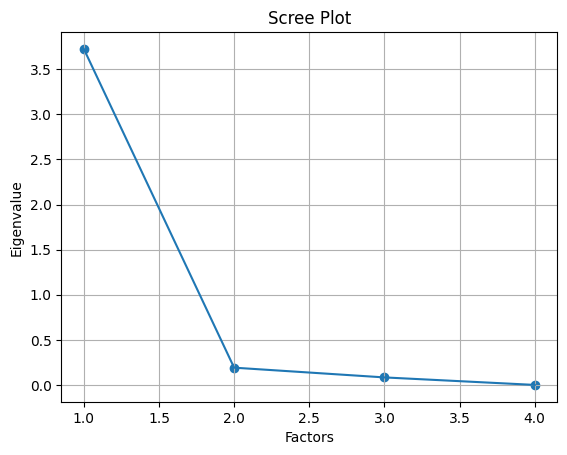

Factor Loadings:
[[ 8.71129990e-01  1.47558020e-01 -8.38508512e-05]
 [ 8.71129990e-01  1.47558020e-01 -8.38508512e-05]
 [ 6.66128322e-01  1.79441786e-01  5.83315808e-02]
 [ 2.54461811e-01  7.73334413e-01  1.66343657e-07]]

Factor Scores (Test Set):
[[ 4.07595001 -0.63383732  7.51878428]
 [ 4.82482243 -0.46235893  7.26629712]
 [-5.50663042  0.46461162 -7.67808575]
 [ 1.020998    1.15259752  3.40819611]
 [-4.21815524 -1.3281999  -4.7802513 ]]


In [4]:
fa = FactorAnalyzer()

# Fit the model to your data
fa.fit(df)

# Get the factor loadings
loadings = fa.loadings_

# Get the eigenvalues
eigenvalues, _ = fa.get_eigenvalues()

# Plot scree plot to determine the number of factors
plt.scatter(range(1, df.shape[1]+1), eigenvalues)
plt.plot(range(1, df.shape[1]+1), eigenvalues)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

# Determine the number of factors based on the scree plot
# You can also use other criteria such as Kaiser's criterion or a fixed number of factors
num_factors = 3  # Adjust this based on your analysis

fa = FactorAnalyzer(n_factors=num_factors, rotation='varimax')
fa.fit(train_df_scaled)

# Get factor scores for each observation in the test set
factor_scores_test = fa.transform(test_df_scaled)

# Print factor loadings
print("Factor Loadings:")
print(loadings)

# Print factor scores for the first few observations in the test set
print("\nFactor Scores (Test Set):")
print(factor_scores_test[:5, :])